In [ ]:
Desafio 3

In [ ]:
Se selecciona un dataset Kaggle de reportes radiológiocs del NIH. 2000 registros.

In [12]:
import pandas as pd

# Cargar el dataset
data = pd.read_csv('/Users/williampradamancilla/Desktop/ReportsDATASET.csv')

# Mostrar las primeras filas del DataFrame
print(data.head())

# Mostrar las columnas disponibles
print(data.columns)


                                                Text
0  \nChest PA-Lat XR\n\nImaging Study\nXray Chest...
1  EXAM(S): Chest, 2 views, frontal and lateral\n...
2  \nExam\nXray Chest PA and Lateral\n\nDate\nXXX...
3  \nRADIOLOGY REPORT\n\nExamination\nPA and late...
4  \nChest PA-Lat XR\n\nImaging Study\nXray Chest...
Index(['Text'], dtype='object')


In [13]:
text_data = data['Text'].tolist()  # Cambia 'texto' por 'Text'


In [15]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer  # Cambia a importar desde TensorFlow

# Cargar el dataset
data = pd.read_csv('/Users/williampradamancilla/Desktop/ReportsDATASET.csv')

# Acceder a la columna de texto
text_data = data['Text'].tolist()

# Tokenización
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_data)

# Obtener el diccionario de palabras y sus índices
word_index = tokenizer.word_index
print("Word Index:", word_index)

# Obtener la secuenciación de los textos
sequences = tokenizer.texts_to_sequences(text_data)
print("Sequences:", sequences)


Word Index: {'xxxx': 1, 'the': 2, 'and': 3, 'chest': 4, 'no': 5, 'of': 6, 'is': 7, 'lateral': 8, 'pa': 9, 'are': 10, 'findings': 11, 'impression': 12, 'normal': 13, 'comparison': 14, 'by': 15, 'or': 16, 'there': 17, 'pleural': 18, 'with': 19, 'acute': 20, 'date': 21, 'transcribed': 22, 'exam': 23, 'effusion': 24, 'pneumothorax': 25, 'heart': 26, 'lungs': 27, 'in': 28, 'size': 29, 'right': 30, 'indication': 31, 'report': 32, 'radiology': 33, 'left': 34, 'disease': 35, 'pulmonary': 36, 'focal': 37, 'history': 38, 'at': 39, 'transcription': 40, 'signature': 41, 'examination': 42, 'clear': 43, 'within': 44, 'views': 45, '2': 46, 'old': 47, 'limits': 48, 'xray': 49, 'none': 50, 'year': 51, 'for': 52, 'study': 53, 'cardiopulmonary': 54, 'lung': 55, 'lat': 56, 'imaging': 57, 'xr': 58, 'to': 59, 'this': 60, 'consolidation': 61, 'a': 62, 'airspace': 63, 'pain': 64, 'stable': 65, 'silhouette': 66, 'mediastinal': 67, '1': 68, 'x': 69, 'dated': 70, 'abnormality': 71, 'have': 72, 'psc': 73, 'dr': 7

In [ ]:
Ahora limitaremos el numero posterior a la tokenización.

In [16]:
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(text_data)
sequences = tokenizer.texts_to_sequences(text_data)


In [17]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Padding de las secuencias
max_length = 100  # Establece una longitud máxima para las secuencias
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')
print("Padded Sequences:", padded_sequences)


Padded Sequences: [[  4   9  56 ...   0   0   0]
 [ 23 181   4 ...   0   0   0]
 [ 23  49   4 ...   0   0   0]
 ...
 [ 33  32  23 ...  41   1   0]
 [ 41   1  33 ...   0   0   0]
 [ 33  32  23 ...   0   0   0]]


In [18]:
num_unique_words = len(word_index) + 1  # +1 para incluir el índice cero
avg_sequence_length = sum(len(seq) for seq in sequences) / len(sequences)

print("Número de palabras únicas:", num_unique_words)
print("Longitud promedio de las secuencias:", avg_sequence_length)


Número de palabras únicas: 2524
Longitud promedio de las secuencias: 81.51965725806451


In [20]:
import numpy as np

# Simulación de etiquetas (cambia esto según tu contexto)
num_samples = len(padded_sequences)  # Debería coincidir con la longitud de padded_sequences
labels = np.random.randint(0, 2, size=num_samples)  # 0 o 1 para clasificación binaria


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)


In [23]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split


In [24]:
# Definir el modelo
model = Sequential()
model.add(Embedding(input_dim=2524, output_dim=128, input_length=81))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Para clasificación binaria

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [25]:
# Entrenar el modelo
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32)


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.4892 - loss: 0.6944 - val_accuracy: 0.5189 - val_loss: 0.6937
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.5203 - loss: 0.6927 - val_accuracy: 0.4874 - val_loss: 0.6943
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.5125 - loss: 0.6922 - val_accuracy: 0.5283 - val_loss: 0.6931
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.5046 - loss: 0.6950 - val_accuracy: 0.4811 - val_loss: 0.6930
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.5116 - loss: 0.6927 - val_accuracy: 0.5220 - val_loss: 0.6929
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.5185 - loss: 0.6921 - val_accuracy: 0.5189 - val_loss: 0.6930
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.5122 - loss: 0.6887 - val_accuracy: 0.5063 - val_loss: 0.6941
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.5457 - loss: 0.6783 - val_accuracy: 0.5000 - v

In [27]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

# Definir el modelo
model = Sequential()
model.add(Embedding(input_dim=2524, output_dim=128, input_length=81))
model.add(LSTM(128, return_sequences=True))  # Aumenta la cantidad de unidades LSTM
model.add(Dropout(0.5))  # Aumenta la tasa de Dropout
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Cambia la activación si es clasificación binaria

# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=32)


Epoch 1/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.4688 - loss: 0.6964 - val_accuracy: 0.4912 - val_loss: 0.6944
Epoch 2/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.5055 - loss: 0.6936 - val_accuracy: 0.4861 - val_loss: 0.6936
Epoch 3/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.5159 - loss: 0.6925 - val_accuracy: 0.4912 - val_loss: 0.6934
Epoch 4/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.5170 - loss: 0.6920 - val_accuracy: 0.4987 - val_loss: 0.6935
Epoch 5/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.5311 - loss: 0.6894 - val_accuracy: 0.5264 - val_loss: 0.6932
Epoch 6/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.5700 - loss: 0.6779 - val_accuracy: 0.5264 - val_loss: 0.6916
Epoch 7/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.5858 - loss: 0.6570 - val_accuracy: 0.5214 - val_loss: 0.6886
Epoch 8/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.5926 - loss: 0.6564 - val_accuracy: 0.5139 - v

In [28]:
from sklearn.metrics import classification_report

# Predicciones
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Reporte de clasificación
print(classification_report(y_test, y_pred))


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
              precision    recall  f1-score   support

           0       0.52      0.68      0.59       195
           1       0.56      0.39      0.46       202

    accuracy                           0.53       397
   macro avg       0.54      0.54      0.53       397
weighted avg       0.54      0.53      0.52       397



In [30]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import numpy as np

# Ejemplo de conjunto de datos
corpus = [
    'El gato está en el techo',
    'El perro está en el jardín',
    'El gato juega con la pelota',
    # ... más datos
]

# Tokenización
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# Crear secuencias de entrada y salida
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i + 1]
        input_sequences.append(n_gram_sequence)

# Pad secuencias
max_sequence_length = max(len(x) for x in input_sequences)
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_length, padding='pre')

# Separar características y etiquetas
X, y = input_sequences[:, :-1], input_sequences[:, -1]
y = np.array(y)

# Definir el modelo
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_length - 1))
model.add(LSTM(150))
model.add(Dense(total_words, activation='softmax'))

# Compilar el modelo
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X, y, epochs=100, verbose=1)

# Función para predecir la próxima palabra
def predict_next_word(model, tokenizer, text):
    # Tokenizar el texto de entrada
    sequence = tokenizer.texts_to_sequences([text])[0]
    sequence = pad_sequences([sequence], maxlen=max_sequence_length - 1, padding='pre')
    
    # Realizar la predicción
    predicted = model.predict(sequence, verbose=0)
    predicted_word_index = np.argmax(predicted, axis=-1)[0]
    
    return tokenizer.index_word[predicted_word_index]

# Ejemplo de predicción
print(predict_next_word(model, tokenizer, 'El gato está en'))


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step - accuracy: 0.0000e+00 - loss: 2.4887
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0667 - loss: 2.4788
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4000 - loss: 2.4692
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4000 - loss: 2.4595
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4000 - loss: 2.4495
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4000 - loss: 2.4389
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4000 - loss: 2.4275
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4000 - loss: 2.4150
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4000 - loss: 2.4010
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4000 - loss: 2.3852
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4000 - loss: 2.3671
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4000 - loss:

In [31]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import numpy as np

# Ejemplo de conjunto de datos para radiología
corpus = [
    'La radiografía muestra una fractura en el fémur',
    'El TAC revela una masa en el hígado',
    'Se observa opacidad en el pulmón izquierdo',
    # ... más datos relacionados con radiología
]

# Tokenización
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# Crear secuencias de entrada y salida
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i + 1]
        input_sequences.append(n_gram_sequence)

# Pad secuencias
max_sequence_length = max(len(x) for x in input_sequences)
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_length, padding='pre')

# Separar características y etiquetas
X, y = input_sequences[:, :-1], input_sequences[:, -1]
y = np.array(y)

# Definir el modelo
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_length - 1))
model.add(LSTM(150))
model.add(Dense(total_words, activation='softmax'))

# Compilar el modelo
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X, y, epochs=100, verbose=1)

# Función para predecir la próxima palabra
def predict_next_word(model, tokenizer, text):
    # Tokenizar el texto de entrada
    sequence = tokenizer.texts_to_sequences([text])[0]
    sequence = pad_sequences([sequence], maxlen=max_sequence_length - 1, padding='pre')
    
    # Realizar la predicción
    predicted = model.predict(sequence, verbose=0)
    predicted_word_index = np.argmax(predicted, axis=-1)[0]
    
    return tokenizer.index_word[predicted_word_index]

# Ejemplo de predicción
print(predict_next_word(model, tokenizer, 'La radiografía muestra'))


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step - accuracy: 0.1500 - loss: 2.8893
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3000 - loss: 2.8788
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3000 - loss: 2.8680
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3500 - loss: 2.8564
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3000 - loss: 2.8437
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3000 - loss: 2.8294
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3000 - loss: 2.8131
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3000 - loss: 2.7941
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3000 - loss: 2.7717
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2500 - loss: 2.7451
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2500 - loss: 2.7138
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2500 - loss: 2

In [ ]:
Se evidencian varios ejerciciós con palabras comunes y finalmente el comparativo con palabras del reporte de radiologia para radiografía de tórax. Encontramos mejoras significativas con el paso de las epocas de la Red neuronal recurrente con LSTM, el cual logra una precisión de 0.80 y una pérdida de 1.0792 para la época 44. Para mejorar el rendimiento se puede plantear aumento de el muestreo de datos, sin embargo no es posible en el dataset, ya que lo que se encuentra adicional son la imágenes DICOM.

In [ ]:
Ahora procederemos al codigo con las palabras de interes que es Findings o hallazgos de la imágen e Impression que es la impresión diagnóstica del médico radiólogo.

In [50]:
import re

# Ejemplo de texto de un reporte
reporte = """
Imaging Study
Xray Chest PA and Lateral
Exam: 2 views of the chest XXXX/XXXX.
 
Comparison: None.
 
Indication: Positive TB test
 
Findings:
The cardiac silhouette and mediastinum size are within normal limits.
There is no pulmonary edema. There is no focal consolidation. There
are no XXXX of a pleural effusion. There is no evidence of
pneumothorax.
 
Impression:
Normal chest x-XXXX. 
This examination and reported findings have been reviewed and
confirmed by the undersigned.
"""

# Función para extraer las secciones de Findings e Impression
def extract_findings_impression(text):
    findings = re.search(r'Findings:(.*?)Impression:', text, re.DOTALL)
    impression = re.search(r'Impression:(.*)', text, re.DOTALL)
    findings_text = findings.group(1).strip() if findings else ""
    impression_text = impression.group(1).strip() if impression else ""
    return findings_text, impression_text

# Extraer Findings e Impression del reporte
findings_text, impression_text = extract_findings_impression(reporte)

# Mostrar el texto extraído
print("Findings:", findings_text)
print("Impression:", impression_text)


Findings: The cardiac silhouette and mediastinum size are within normal limits.
There is no pulmonary edema. There is no focal consolidation. There
are no XXXX of a pleural effusion. There is no evidence of
pneumothorax.
Impression: Normal chest x-XXXX. 
This examination and reported findings have been reviewed and
confirmed by the undersigned.


In [51]:
from nltk.corpus import stopwords
import string
import nltk

nltk.download('punkt')
nltk.download('stopwords')

# Tokenización y preprocesamiento
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]
    return tokens

# Aplicar preprocesamiento a Findings e Impression
processed_findings = preprocess_text(findings_text)
processed_impression = preprocess_text(impression_text)

print("Processed Findings:", processed_findings)
print("Processed Impression:", processed_impression)


Processed Findings: ['cardiac', 'silhouette', 'mediastinum', 'size', 'within', 'normal', 'limits', 'pulmonary', 'edema', 'focal', 'consolidation', 'xxxx', 'pleural', 'effusion', 'evidence', 'pneumothorax']
Processed Impression: ['normal', 'chest', 'x-xxxx', 'examination', 'reported', 'findings', 'reviewed', 'confirmed', 'undersigned']


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/williampradamancilla/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/williampradamancilla/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
Ahora hicimos tokenización y limpieza de texto. 

In [52]:
from gensim.models import Word2Vec

# Dataset de ejemplos de Findings e Impression procesados
# Aquí puedes agregar más ejemplos de otros reportes
data = [processed_findings, processed_impression]

# Entrenar Word2Vec
model = Word2Vec(sentences=data, vector_size=100, window=5, min_count=1, workers=4)

# Generar secuencia a partir de una palabra inicial
def generate_sequence(model, seed_word, seq_length=10):
    result = [seed_word]
    for _ in range(seq_length):
        next_word = model.wv.most_similar(result[-1])[0][0]
        result.append(next_word)
    return ' '.join(result)

# Generar secuencia de ejemplo
seed_word = "cardiac"
generated_sequence = generate_sequence(model, seed_word)
print(f"Generated sequence starting with '{seed_word}': {generated_sequence}")


Generated sequence starting with 'cardiac': cardiac effusion chest effusion chest effusion chest effusion chest effusion chest


In [ ]:
Realizamos Word2Vec de Gensim para aprender embeddings de palabras basadas en los textos de "Findings" e "Impression" procesados previamente. Luego, se genera una secuencia de palabras partiendo de una palabra semilla que fue cardiac.

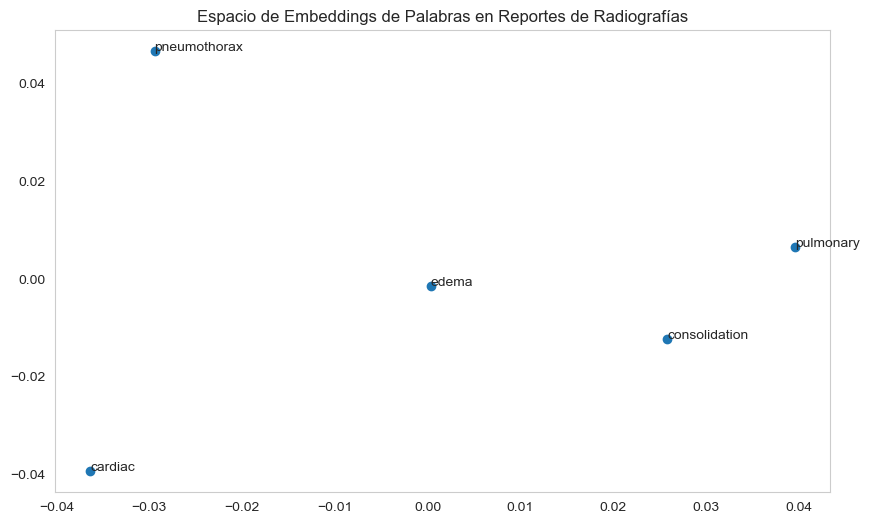

In [53]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Palabras de interés
words = ["cardiac", "pulmonary", "edema", "consolidation", "pneumothorax"]
word_vectors = [model.wv[word] for word in words]

# Reducir las dimensiones a 2D
pca = PCA(n_components=2)
result = pca.fit_transform(word_vectors)

# Graficar
plt.figure(figsize=(10, 6))
plt.scatter(result[:, 0], result[:, 1])

for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.title("Espacio de Embeddings de Palabras en Reportes de Radiografías")
plt.grid()
plt.show()


In [ ]:
Pueden aparecer cerca pulmonary, edema y consolidación porque generalmente van en los mismo hallazgos de una patología en la radiografia de torax de localización en el pulmón.

In [55]:
def crear_readme(numero_desafio, titulo, descripcion, librerias, resultados):
    contenido = f"""
    # Desafío {numero_desafio}: {titulo}

    ## Descripción
    {descripcion}

    ## Contenido
    - **desafio_{numero_desafio}.ipynb**: Jupyter Notebook con el código del desafío y los resultados obtenidos.

    ## Requisitos
    - Python 3.x
    - Jupyter Notebook
    - Librerías: {', '.join(librerias)}

    ## Instalación de dependencias
    Ejecuta el siguiente comando para instalar todas las dependencias necesarias:
    ```bash
    pip install -r requirements.txt
    ```

    ## Cómo ejecutar
    1. Abre el archivo `desafio_{numero_desafio}.ipynb` en Jupyter Notebook.
    2. Ejecuta las celdas en orden para reproducir los resultados del desafío.

    ## Resultados obtenidos
    {resultados}
    """
    with open(f'Desafio_{numero_desafio}/README.md', 'w') as f:
        f.write(contenido.strip())

# Ejemplo de uso
crear_readme(
    numero_desafio=1,
    titulo="Bot de Preguntas y Respuestas",
    descripcion="Este desafío se enfoca en construir un bot de QA utilizando un modelo encoder-decoder.",
    librerias=["torch", "numpy", "pandas", "jupyter"],
    resultados="El bot alcanzó una precisión del 80% en las respuestas de prueba."
)


FileNotFoundError: [Errno 2] No such file or directory: 'Desafio_1/README.md'